In [1]:
# Install python packages
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv("prices.csv")

print (df)

           date     value
0      8/1/2021  41659.06
1     7/31/2021  42214.15
2     7/30/2021  40005.93
3     7/29/2021  40002.53
4     7/28/2021  39405.95
...         ...       ...
4590   1/6/2009      0.00
4591   1/5/2009      0.00
4592   1/4/2009      0.00
4593   1/3/2009      0.00
4594   1/2/2009      0.00

[4595 rows x 2 columns]


In [2]:
# Reverse the dataset
df = df.iloc[::-1]

# Remove 0 values
df = df[ df['value']>0]

# Convert datetime format
df['date'] = pd.to_datetime(df['date'])

print (df)

           date       value
4003 2010-08-16      0.0769
4001 2010-08-18      0.0688
4000 2010-08-19      0.0667
3999 2010-08-20      0.0700
3998 2010-08-21      0.0664
...         ...         ...
4    2021-07-28  39405.9500
3    2021-07-29  40002.5300
2    2021-07-30  40005.9300
1    2021-07-31  42214.1500
0    2021-08-01  41659.0600

[4003 rows x 2 columns]


In [3]:
# logarithmic regression fitting
def funct(x, p1, p2):
    return p1*np.log(x) + p2

xdata = np.array([x+1 for x in range(len(df))])
ydata = np.log(df['value'])

popt, pcov = curve_fit(funct, xdata, ydata, p0=(3.0, -10))

print(popt)


[  3.00146577 -15.83713496]


In [4]:
print(xdata)

[   1    2    3 ... 4001 4002 4003]


In [5]:
print(ydata)

4003    -2.565249
4001    -2.676552
4000    -2.707550
3999    -2.659260
3998    -2.712058
          ...    
4       10.581672
3       10.596698
2       10.596783
1       10.650511
0       10.637274
Name: value, Length: 4003, dtype: float64


In [6]:
# curve parameters
p1 = popt[0]
p2 = popt[1]
print (p1)
print (p2)

3.0014657694730738
-15.837134959773506


In [7]:
# plot curve
fittedydata = funct(xdata, p1, p2)
print(fittedydata)

[-15.83713496 -13.75667742 -12.53968778 ...   9.0579214    9.05867148
   9.05942138]


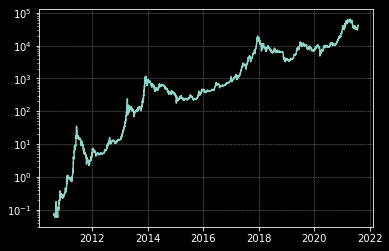

In [8]:
plt.style.use("dark_background")

plt.semilogy(df['date'], df['value'])

# add grid
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

plt.show()

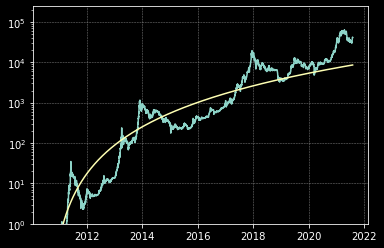

In [9]:
# plot the date and bitcoin price
plt.semilogy(df['date'], df['value'])

# plot the curve
plt.plot(df['date'], np.exp(fittedydata))

# set the bottom as 1
plt.ylim(bottom = 1)

# add grid
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

plt.show()

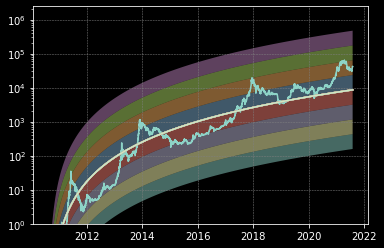

In [10]:
# curve parameters
p1 = popt[0]
p2 = popt[1]

# plot curve
fittedydata = funct(xdata, p1, p2)

# set dark background
plt.style.use("dark_background")

# plot date and value
plt.semilogy(df['date'], df['value'])

# fill the plot with rainbow
for i in range(-3,5):
    plt.fill_between(df['date'], np.exp(fittedydata + i -1), np.exp(fittedydata + i), alpha = 0.5)

    plt.plot(df['date'], np.exp(fittedydata))

# set the bottom as 1
plt.ylim(bottom = 1)

# add grid
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

plt.show()